Non Random quick sort: here, we are taking the last element as the pivot 

In [31]:
def quicksort_non_random(arr, low, high):
    if low < high:
      
        pivot_index = partition(arr, low, high)
        
        
        quicksort_non_random(arr, low, pivot_index - 1)
        quicksort_non_random(arr, pivot_index + 1, high)

def partition(arr, low, high):
    pivot = arr[high]  
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
   
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i + 1


Random quick sort: The random version picks a pivot index at random. 

In [32]:
import random

def quicksort_random(arr, low, high):
    if low < high:
        pivot_index = random_partition(arr, low, high)
        quicksort_random(arr, low, pivot_index - 1)
        quicksort_random(arr, pivot_index + 1, high)

def random_partition(arr, low, high):
    rand_index = random.randint(low, high)
    arr[rand_index], arr[high] = arr[high], arr[rand_index]
    return partition(arr, low, high)


Best case inputs


In [33]:
def generate_best_case_input(n):
   
    arr = list(range(n))
    return best_case_helper(arr)

def best_case_helper(nums):
    if len(nums) <= 1:
        return nums
    mid = len(nums) // 2
    left = best_case_helper(nums[:mid])
    right = best_case_helper(nums[mid+1:])
    return left + right + [nums[mid]]


Worst case 

In [34]:
def generate_worst_case_input(n):
    return list(range(n))  


Average case 


In [35]:
import random

def generate_average_case_input(n):
    return [random.randint(0, 10_000_000) for _ in range(n)]

Benchmarking the non-random pivot version of quicksort 

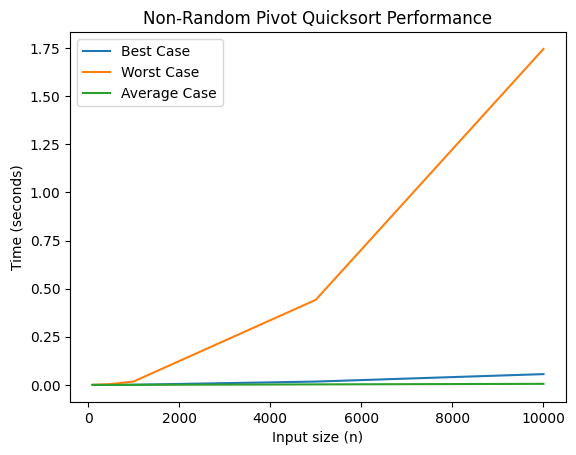

In [36]:
import time
import matplotlib.pyplot as plt

import sys
sys.setrecursionlimit(10**6)  
n_values = [100, 500, 1000, 5000, 10000]
times_best = []
times_worst = []
times_avg   = []

for n in n_values:
    arr_best = generate_best_case_input(n)
    start = time.time()
    quicksort_non_random(arr_best, 0, n-1)
    end = time.time()
    times_best.append(end - start)
    
    
    arr_worst = generate_worst_case_input(n)
    start = time.time()
    quicksort_non_random(arr_worst, 0, n-1)
    end = time.time()
    times_worst.append(end - start)
    
   
    runs = 5
    total_time = 0
    for _ in range(runs):
        arr_avg = generate_average_case_input(n)
        start_avg = time.time()
        quicksort_non_random(arr_avg, 0, n-1)
        end_avg = time.time()
        total_time += (end_avg - start_avg)
    times_avg.append(total_time / runs)


plt.plot(n_values, times_best, label="Best Case")
plt.plot(n_values, times_worst, label="Worst Case")
plt.plot(n_values, times_avg, label="Average Case")
plt.xlabel("Input size (n)")
plt.ylabel("Time (seconds)")
plt.title("Non-Random Pivot Quicksort Performance")
plt.legend()
plt.show()
